In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prosper-loan/prosperLoanData.csv


# **Loading the prosper loan data**
​
We now know that we are working with a typical CSV file (i.e., the delimiter is ,, etc.). We proceed to loading the data into memory.

In [2]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load dataset
# above .csv file is comma delimited
loan = pd.read_csv('../input/prosper-loan/prosperLoanData.csv')

In [5]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
loan.shape

(113937, 81)

In [7]:
#We want a summary of the dataframe 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

We can observe that those columns that have symbols are in object form as well as some columns should be of an integer type but are of an object type. Now let us detect which columns have symbols and if there are any other symbols too.

In [8]:
#telling about certain statistics of each column
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


# **What is the structure of your dataset?**
​
There are 113,937 loans in the dataset with 81 features. Most variables are numeric and categorical in nature.
​
The dataset features can be split into two main categories:
​
1) Borrower information
​
2) Loan performance information

# **What features in the dataset do you think will help support your investigation into your feature(s) of interest**

The dataset seems to contain 81 variables. Since it is tedious to explore all 81 variables, i have spotted 20 important variables whose exploration is very necessary. Then i divided these 20 variables into 3 groups, just to make analysis easy :-

Loan variables : This contains variables Term, LoanOriginalAmount,BorrowerAPR, BorrowerRate, LenderYield, LoanStatus , ListingCategory , ListingCreationDate.

Background borrower : This contains variables which help us to analyse the economic state of borrowers like IncomeRange, StatedMonthlyIncome, EmploymentStatus,DebtToIncomeRatio, BorrowerState and Occupation.

Other variables : This involves variables like CreditGrade, ProsperRating and ProsperScore which help us analyse which risk category the borrower belongs to.


# **Univariate Exploration**

## **Goal**

Analyse individual variables and see their distribution. See if any unusual points or outliers are present and fix them accordingly.

In [9]:
loans = loan.copy()

In [10]:
loans.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)


We can see that there are several categorical variables(object datatype) in the variables we've chosen. First let's analyse them one by one -

## **1. Income Range**

The income range of the borrower at the time the listing was created.

In [11]:
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

There are 2 categories - ‘Not employed’ and ‘$0’ , these both are basically unemployed people so I'll be replacing ‘Not employed’

In [12]:
loans.IncomeRange = loans.IncomeRange.str.replace('Not employed','$0')


In [13]:
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

Text(0.5, 1.0, 'Income Range count')

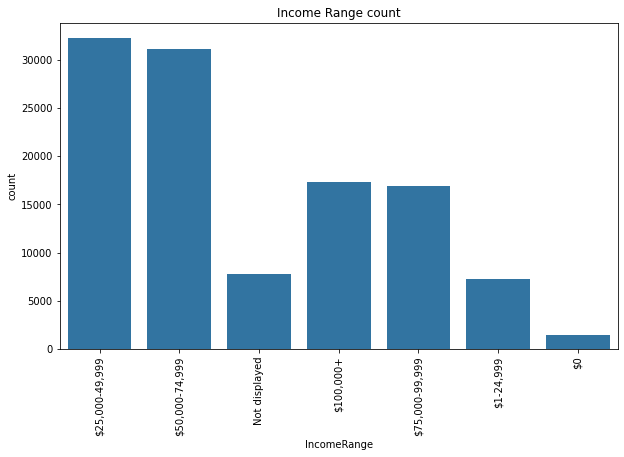

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(loans.IncomeRange,color = sns.color_palette()[0]);
plt.xticks(rotation= 90);
plt.title("Income Range count")

The plot shows that mostly employed people take loan. There are 1427 unemployed people and 7741 people who have not provided their income.



## **2. Loan Status**
The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

In [15]:
loans.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

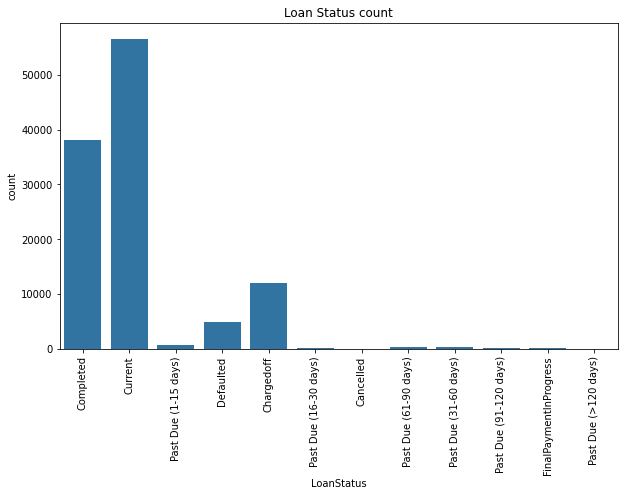

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(loans.LoanStatus,color = sns.color_palette()[0]);
plt.xticks(rotation= 90);
plt.title("Loan Status count");

Most loans are completed or are currently going on . Ongoing loans suggests their growth.

## **3. Occupation**
The Occupation selected by the Borrower at the time they created the listing.

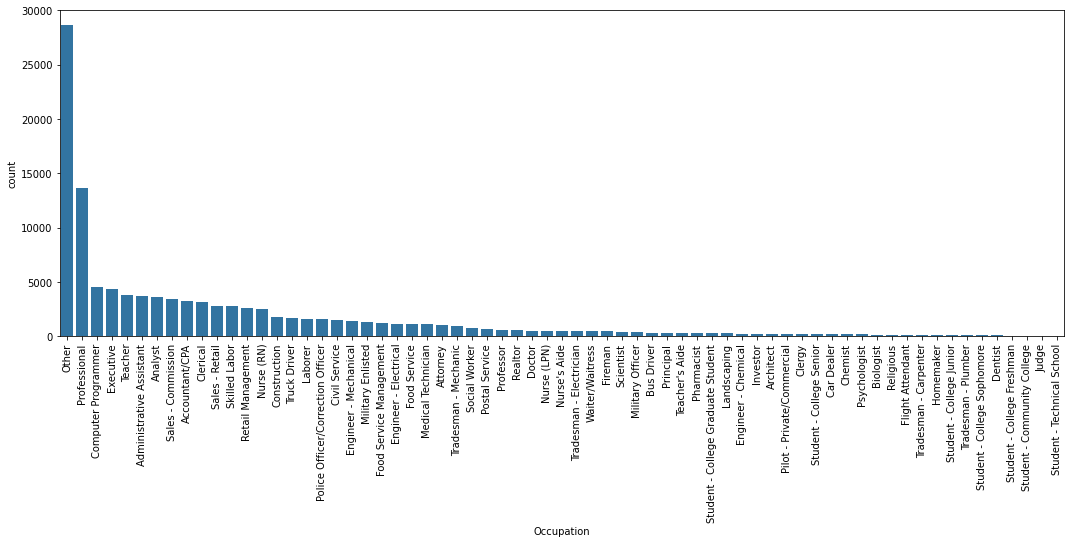

In [17]:
plt.figure(figsize=(18,6))
sns.countplot(loans.Occupation,color = sns.color_palette()[0], order = loans.Occupation.value_counts().index);
plt.xticks(rotation= 90);

Most people were not comfortable in sharing their occupation .Other popular occupations are Professional, Computer Programmer, Executive , Teacher etc .
It can be seen at the end of graph there are several categories of students , lets have a look at them separately .

In [18]:
stu = loan[loans.Occupation.str.contains("Student")==True]

In [19]:
stu.Occupation.value_counts()

Student - College Graduate Student    245
Student - College Senior              188
Student - College Junior              112
Student - College Sophomore            69
Student - College Freshman             41
Student - Community College            28
Student - Technical School             16
Name: Occupation, dtype: int64

In [20]:
len(stu.Occupation)/len(loans.Occupation)

0.006134969325153374

We can see that 0.6% of the borrowers are students.
Students are potential borrower but still Prosper is not very famous among them. Company should make policies to encourage them to take loans.

## **4. Borrower State**
The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

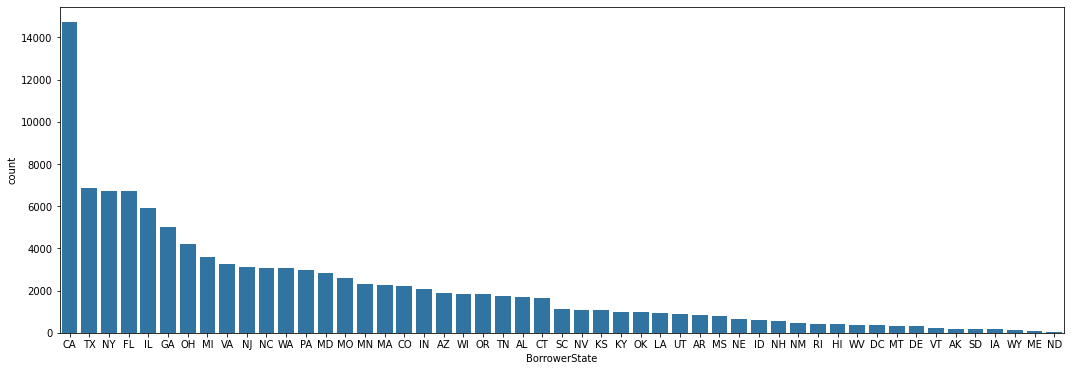

In [21]:
plt.figure(figsize=(18,6))

sns.countplot(loans.BorrowerState,color = sns.color_palette()[0],order = loans.BorrowerState.value_counts().index);

The most popular state is California mostly because Prosper was founded. Other popular states include Florida, New York, Texas etc.

## **5. Listing Category**
The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [22]:
#plt.figure(figsize=(18,6))

#label = [["Not Available","Debt Consolidation", "Home Improvement", "Business","Personal Loan", "Student Use", "Auto","Other", "Baby & Adoption","Boat", "Cosmetic Procedure", "Engagement Ring", "Green Loans","Household Expenses", "Large Purchases", "Medical/Dental", "Motorcycle", "RV", "Taxes", "Vacation", "Wedding Loans", "Other", "Not Applicable"]]

#ax = sns.countplot(loans.ListingCategory,color = sns.color_palette()[0]);
#ax.set_xticklabels(label, rotation='vertical', fontsize=10)
#plt.show()

Most popular reasons to take a loan are Debt Consolidation, Home Improvement, Buisiness and Personal loan among several other reasons. Though a lot of people are not comfortable in sharing their reasons which comes under 'Not Available' and 'Other' .

## **6. Employement Status**
The employment status of the borrower at the time they posted the listing.

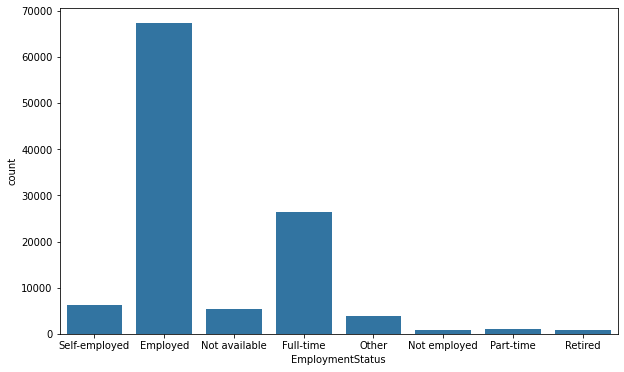

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(loans.EmploymentStatus ,color = sns.color_palette()[0]);
plt.show()

People who are not employed or do not have a stable job are not much into Prosper which is an obvious thing. Even self-employed also in less proportion.

## **7. Credit Grade and Prosper Rating**
The Prosper Rating assigned at the time the listing was created between AA - HR. In pre-2009 phase it was called credit grade, after 2009 it was called prosper rating.

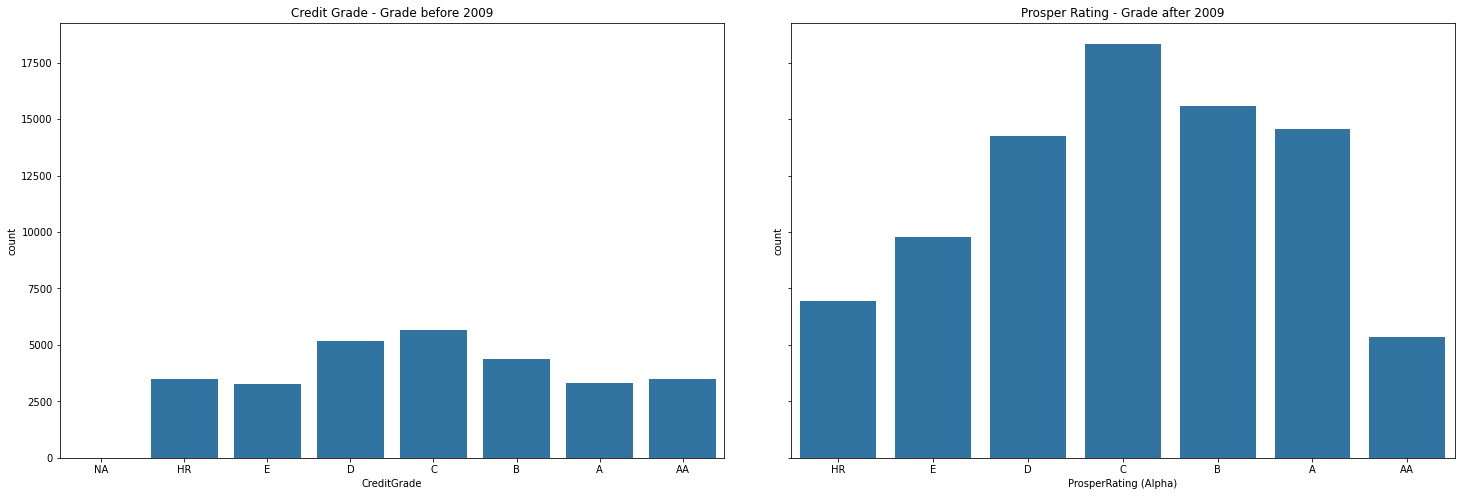

In [24]:
fig, ax = plt.subplots(1,2 ,figsize=(25,8),sharey='row')
#  plt.subplots(2,2,)
fig.subplots_adjust(wspace=0.1)

x = sns.countplot(loans.CreditGrade ,ax=ax[0],color = sns.color_palette()[0],order =[ "NA","HR", "E", "D", "C", "B","A", "AA"])
x.title.set_text("Credit Grade - Grade before 2009")

y=sns.countplot(loans['ProsperRating (Alpha)'] ,ax=ax[1],color = sns.color_palette()[0],order =["HR", "E", "D", "C", "B","A", "AA"])
y.title.set_text("Prosper Rating - Grade after 2009")

fig.show()

These are the ratings provided by Prosper to its borrowers. Prosper has seven loan grades called Prosper Ratings: AA, A, B, C, D, E and HR where AA is the lowest risk down to HR which actually stands for high risk. Rates start at 5.99% for a 3-year AA loan up to 31.72% for an HR loan.

After the period of 2009 , we can see that majority of people belong to the high risk range, i.e. HR - B . From the above graphs we can see that the lowest risk category AA count has increased in Prosper Rating.

## Now, let's analyse the numerical variables one by one -

## **1. Credit Score**
The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

In [25]:
loans.CreditScoreRangeLower.describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [26]:
loans.CreditScoreRangeUpper.describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

In [27]:
loans['CreditScore'] = (loans.CreditScoreRangeLower + loans.CreditScoreRangeUpper)/2

In [28]:
loans.CreditScore.describe()

count    113346.000000
mean        695.067731
std          66.458275
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScore, dtype: float64

There are two variables in the dataset CreditScoreRangeLower and CreditScoreRangeUpper . CreditScoreRangeLower is the lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency, and CreditScoreRangeUpper is the upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. I converted them into a single variable called CreditScore for my analysis .

In [29]:
loans['CreditScore'].replace(np.nan, loans.CreditScore.mean(),inplace=True)

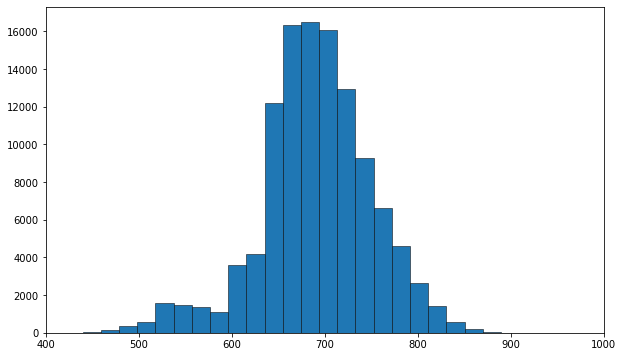

In [30]:
plt.figure(figsize = (10,6))
plt.hist(loans.CreditScore,45,edgecolor='black', linewidth=0.5);
plt.xlim(400,1000);

A majority of the users lie between the 600 and 800 mark, which are decent credit scores.

## **2. Stated Monthly Income**

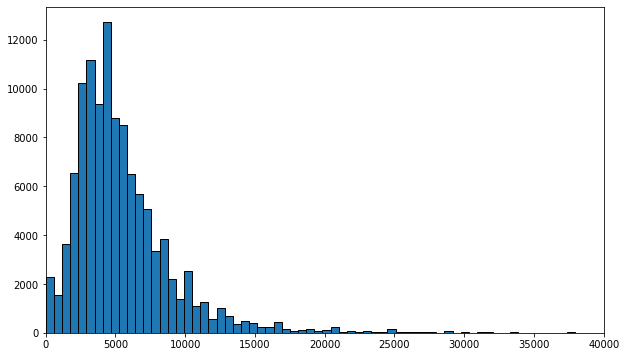

In [31]:
# plt.hist(loans.StatedMonthlyIncome,45,edgecolor='black', linewidth=0.5);
plt.figure(figsize = (10,6))
plt.hist(loans.StatedMonthlyIncome,3000,edgecolor='black');
plt.xlim(0,40000);

In [32]:
loans.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

Max monthly income is 1750003 and minimum is 0. From the graph it can observed that a majority of the users lie between the 2500 and 7500 range, which makes complete sense because people with very high monthly income don't need to take loan and the ones with towards 0 are less likely to take loan because they may get into debt.

## **3. BorrowerAPR, BorrowerRate, LenderYield**
**BorrowerAPR** - The Borrower's Annual Percentage Rate (APR) for the loan.

**BorrowerRate** - The Borrower's interest rate for this loan.

**LenderYield** - The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

In [33]:
loans['BorrowerAPR'].replace(np.nan, loans.BorrowerAPR.mean(),inplace=True)
loans['BorrowerRate'].replace(np.nan, loans.BorrowerRate.mean(),inplace=True)
loans['LenderYield'].replace(np.nan, loans.LenderYield.mean(),inplace=True)

Replaced the NaN values for the variables if present.

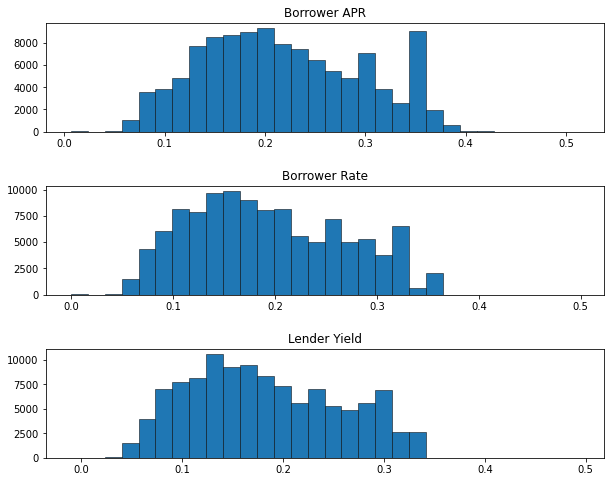

In [34]:
fig, ax = plt.subplots(3,1 ,figsize=(10,8),sharey='row')
#  plt.subplots(2,2,)
fig.subplots_adjust(hspace= 0.5)

ax[0].hist(loans.BorrowerAPR,30,edgecolor='black', linewidth=0.5)
ax[0].set_title("Borrower APR")


ax[1].hist(loans.BorrowerRate,30,edgecolor='black', linewidth=0.5)
ax[1].set_title("Borrower Rate")

ax[2].hist(loans.LenderYield,30,edgecolor='black', linewidth=0.5)
ax[2].set_title("Lender Yield")

fig.show()

The bulk of the loans seem to be 0.08 to 0.25 , which coincides with the credit rating histograms that show that the majority of the users are in the middle of the risk ratings. The lender yield and BorrowerRate plots are similar to borrower APR because they all represent interest rates.
The peak count is slightly lower than the one in the borrower APR plot, and I think it is because of the losses that are made when borrowers is penalized for default or charged off loans.

## **4. Loan Original Amount**

Text(0.5, 1.0, 'Loan OriginalAmount')

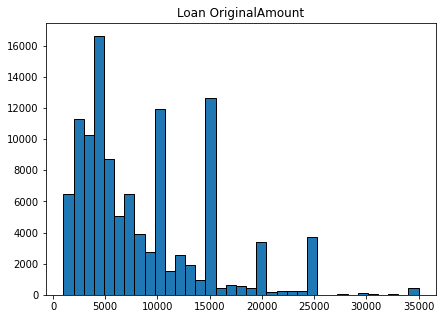

In [35]:
plt.figure(figsize = (7,5))
plt.hist(loans.LoanOriginalAmount,35,edgecolor='black');
plt.title("Loan OriginalAmount")

Most of the loan amount are in the range of 0 - 10000 . One thing that should be noted is that values at multiple of 5000 are more than the other number which is obvious as people have a tendency to go for numbers that are easy to remember .

## **5. Listing Creation Date**


In [36]:
loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'])
loans['year'] = loans['ListingCreationDate'].dt.year

In [37]:
loans.year.value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: year, dtype: int64

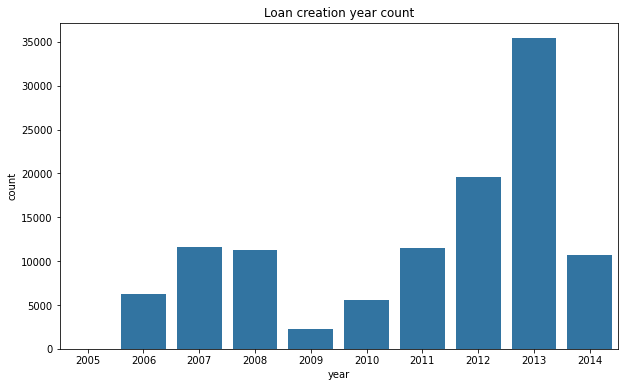

In [38]:
plt.figure(figsize = (10,6))
sns.countplot(loans.year, color = sns.color_palette()[0] )
plt.title("Loan creation year count");

Loan creation dropped to a significant level in 2009 , this may be due to the crisis at that time .

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* The CreditScore when plotted had outlier at zero and some beyond 900 , so I set limits on x-axis( which is xlim(400, 900)) to get the correct plot.

* The StatedMonthlyIncome when plotted had outlier beyond 40000 and so i had to set limits on x-axis( which is plt.xlim(0,40000) ) to get the correct plot.

* Also to plot histograms of numerical variables , I had to remove NaN values from the columns BorrowerAPR, BorrowerRate, LenderYield and CreditScore, and so I replaced NaN with their respective mean .

# **Bivariate Exploration**

In this section I would like to see variation of loan amount with different variables like Income Range , Prosper Rating and year. This would help me in identifying the relationship between class of the people and their role in contributing total loan sum in prosper.

Also, I am keen to know about the delinquent borrowers and how their number is varying with year and the their reason of getting into debt.

I'll be analysing some other relationships like BorrowerAPR and CreditScore with Prosper Rating as this would give me insight about borrower's behaviour as per their rating given on Prosper.com

In [39]:
loann = loans[[ 'Term', 'LoanOriginalAmount','BorrowerAPR', 'BorrowerRate', 'LenderYield', 'LoanStatus' ,'ListingCategory', 'year' ,'IncomeRange', 'StatedMonthlyIncome', 'EmploymentStatus', 'BorrowerState','DebtToIncomeRatio' ,'Occupation', 'CreditGrade', 'ProsperRating (Alpha)', 'ProsperScore', 'CreditScore']]


In [40]:
loann.shape

(113937, 18)

## **1. Loan Amount variation with different Income Range**

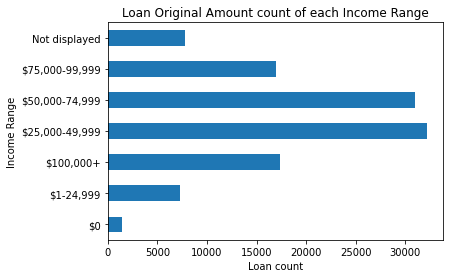

In [41]:
loann.groupby('IncomeRange').LoanOriginalAmount.size().plot(kind='barh',color = sns.color_palette()[0]);
plt.xlabel("Loan count");
plt.ylabel("Income Range");
plt.title("Loan Original Amount count of each Income Range");

People of middle income range 25,000 to 100,000 takes loan in more number while the ones who realy needs it , the people in range 0 and 1-24,999 are in less number. Lets look at one more plot related to sum of loan amount of each range .

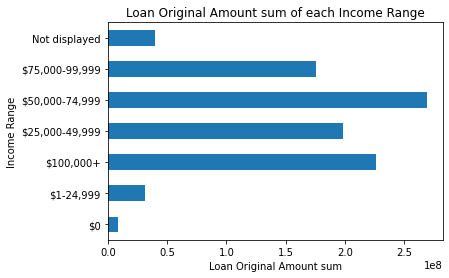

In [42]:
loann.groupby('IncomeRange').LoanOriginalAmount.sum().plot(kind='barh',color = sns.color_palette()[0]);
plt.xlabel("Loan Original Amount sum");
plt.ylabel("Income Range");
plt.title("Loan Original Amount sum of each Income Range");

This graph also show that the people in range of 0 - 25000 are not taking loans or maybe are unable to get it . This may be due to basic salary requirements of the organization to grant a loan, which the low income range don’t meet easily and hence might be unable to get a loan.

## **2. Loan Original Amount variation with Prosper Rating**

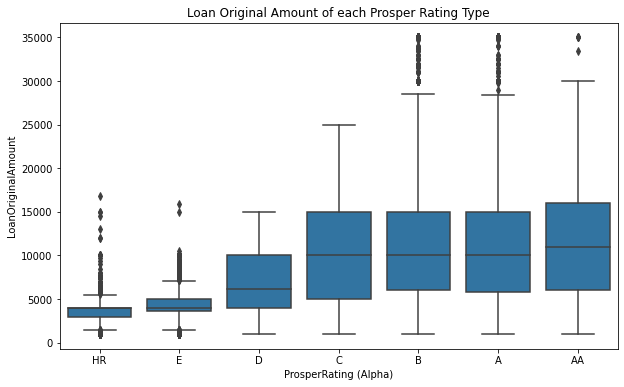

In [43]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.boxplot(data = loann, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', color = base_color,order =["HR", "E", "D", "C", "B","A", "AA"]);
plt.title("Loan Original Amount of each Prosper Rating Type");

The groups of higher risk took lower loan amount and the groups C, B and A looks like have the same median loan amounts. The lowest risk group AA shows highest median loan amount.

The result is as expected as people with lower risk have the tendency to take mnore amount and vice versa .

## **3. Borrower APR variation with Prosper Rating**

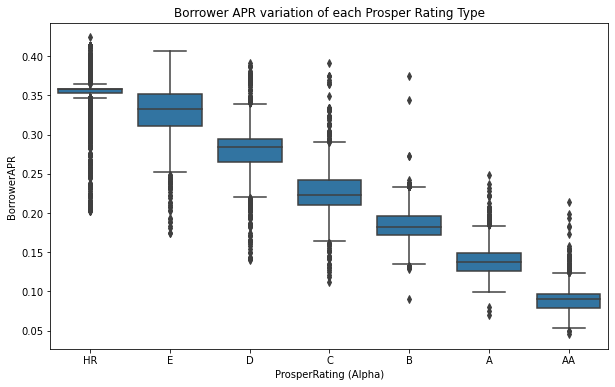

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data = loann, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', color = base_color,order =["HR", "E", "D", "C", "B","A", "AA"]);
plt.title("Borrower APR variation of each Prosper Rating Type");

BorrowerAPR is the Borrower's Annual Percentage Rate (APR) for the loan. As we get into low risk range the APR reduce drastically. Also number of outliers also decreases down the line.

## **4. Credit Score variation with Prosper Rating**

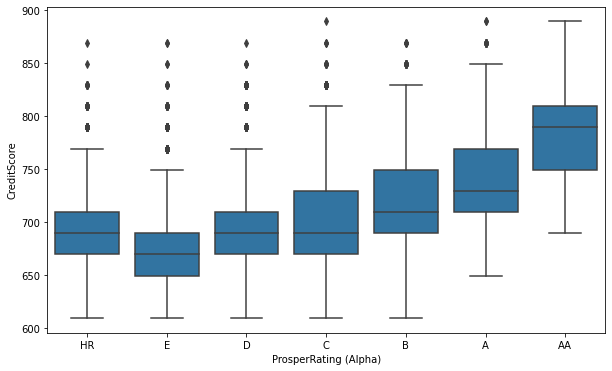

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data = loann, x = 'ProsperRating (Alpha)', y = 'CreditScore', color = base_color,order =["HR", "E", "D", "C", "B","A", "AA"]);


The plot suggests that Prosper Rating has a direct relation with Credit Score . As the borrower move into lower risk range , his credit score also increases.

One thing to be noted here is that Rating HR and D seem to be identical , in terms of IQR and median. Let's have a look at the statistics -

In [46]:
loann.groupby('ProsperRating (Alpha)').CreditScore.describe()

,count,mean,std,min,25%,50%,75%,max
ProsperRating (Alpha),,,,,,,,
A,14551.0,739.442959,40.868789,649.5,709.5,729.5,769.5,889.5
AA,5372.0,783.550633,38.827198,689.5,749.5,789.5,809.5,889.5
B,15581.0,716.400712,37.212600,609.5,689.5,709.5,749.5,869.5
C,18345.0,699.429681,35.217232,609.5,669.5,689.5,729.5,889.5
D,14274.0,689.773224,38.991108,609.5,669.5,689.5,709.5,869.5
E,9795.0,672.042113,35.535378,609.5,649.5,669.5,689.5,869.5
HR,6935.0,686.494953,36.758975,609.5,669.5,689.5,709.5,869.5


Median, min, max, 25% and 75% of D and HR are same , mean vary by a slight difference for both.

## **5. Loan Amount variation with Year**

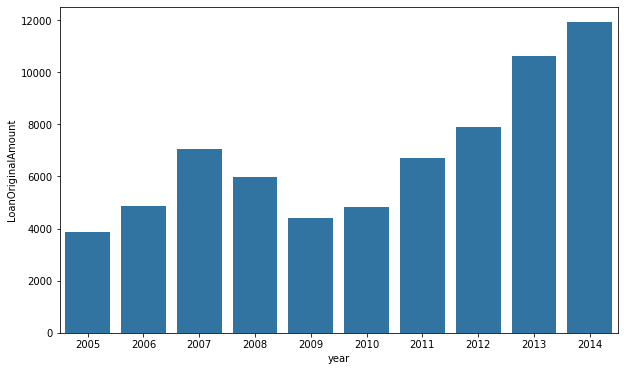

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data = loann, x = 'year', y = 'LoanOriginalAmount', color = base_color,ci = None);

There was decrease in year 2008 and after it loan amount increased.

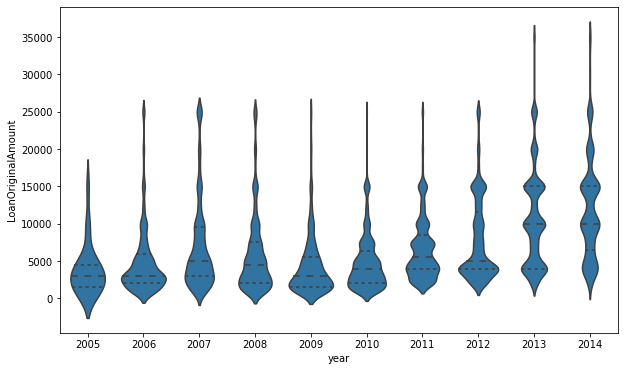

In [48]:
plt.figure(figsize=(10,6))
sns.violinplot(data = loann, x = 'year', y = 'LoanOriginalAmount', color = base_color,inner='quartile');

In [49]:
loann.groupby('year').LoanOriginalAmount.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2005,23.0,3855.956522,3390.504849,1000.0,1500.0,3000.0,4500.00,15000.0
2006,6213.0,4844.807500,4529.587752,1000.0,2000.0,3001.0,6000.00,25000.0
2007,11557.0,7066.793112,6115.814149,1000.0,3000.0,5000.0,9500.00,25000.0
2008,11263.0,5964.698393,5359.843274,1000.0,2100.0,4500.0,7500.00,25000.0
2009,2206.0,4393.478241,4061.447178,1000.0,1500.0,3000.0,5500.00,25000.0
2010,5530.0,4841.877396,3747.511699,1000.0,2000.0,4000.0,6300.00,25000.0
2011,11442.0,6704.403339,4298.327337,2000.0,3907.0,5500.0,8500.00,25000.0
2012,19556.0,7876.517130,5546.632279,2000.0,4000.0,5000.0,11511.25,25000.0
2013,35413.0,10610.240110,6582.891684,2000.0,4000.0,10000.0,15000.00,35000.0


One thing to be noted in the violin plot is that till 2012 , the plot of each year is of max width between 0 to 5000, which suggests that most of the loan amount belong to this range and by lookig at quartile lines inside the plot and the actual values , this is confirmed.

## **6. Delinquent Borrowers**

In [50]:
loann.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [51]:
def Delq (row):
    if row == 'Chargedoff' or row == 'Defaulted' or row == 'Past Due (61-90 days)' or row == 'Past Due (91-120 days)' or row == 'Past Due (61-90 days)' or row == 'Past Due (>120 days)' or row == 'Cancelled':
        return 'Delinquent'
    return 'Good'
    
loann['BorrowerType'] = loann.apply(lambda row: Delq(row.LoanStatus),axis=1)

In [52]:
loann.BorrowerType.value_counts()

Good          96289
Delinquent    17648
Name: BorrowerType, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

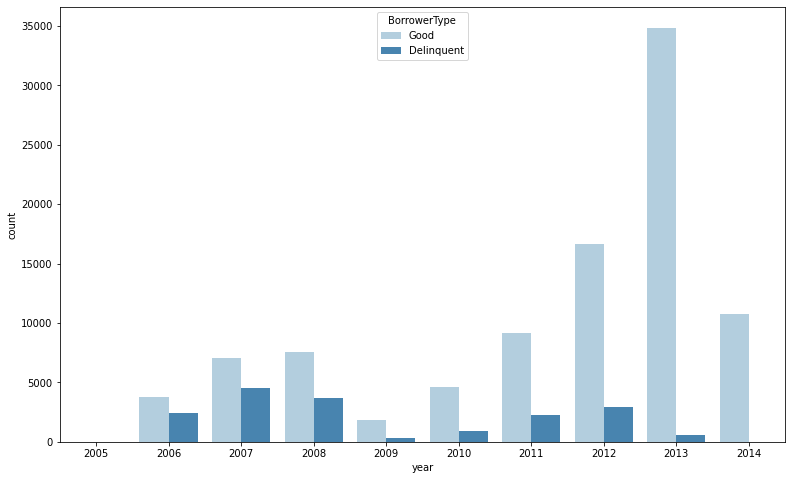

In [53]:
plt.figure(figsize=(13,8))
sns.countplot(data = loann, x = 'year', hue = 'BorrowerType', palette = 'Blues')

One thing to see here is that there's numberof both delinquent and good borrowers follow the same trend except in 2013.
In 2013 number of good borrowers increased drastically while on he other hand number of delinquent borrowers decreased .
In 2014 both the numbers decreased significantly .

## **Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

I have mentioned my analysis of each graph right after it.

## **Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

NO

## **What was the strongest relationship you found?**

The stongest relation showed by the plots was the one between Loan Amounts vs YEAR . This plot showed that the quanity of loans granted increased strongly between 2009 to 2014 .

# **Multivariate Exploration**

In this section my main focus is to analyse the behaviour of delinquent borrowers with variation in factors like credit score, loan amount , year,debt to income ratio etc.

One thing I would like to analyse is how different type of employee types fall into the category of delinquent borrower and how their loan amount varies from one another.

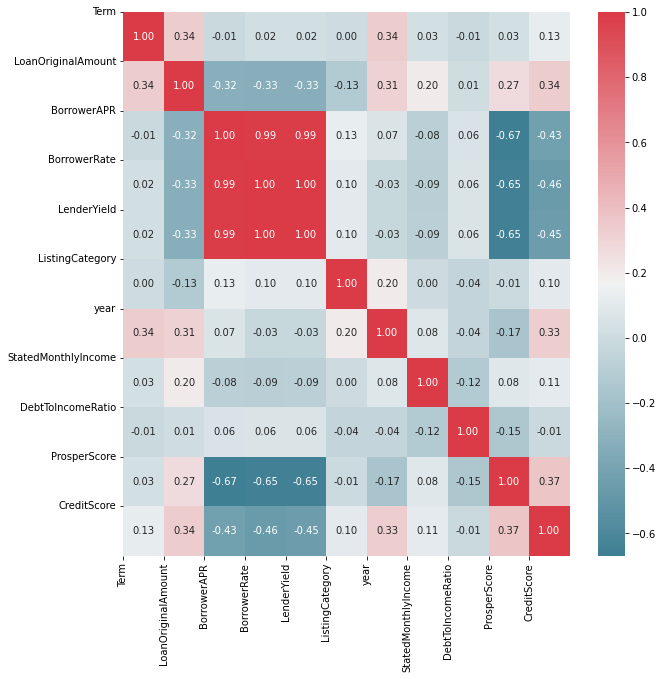

In [54]:
corr = loann.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

From the above correlation plot, it can be concluded that as such there are no two variables that are strongly correlated , other than 'BorrowerAPR', 'BorrowerRate' and 'LenderYield' which are basically not significantly different from one another .
These three are negatively correlated to ProsperScore , but again there is no strong correlation.

# **Prosper Data EDA Questions**

**Introduction**

1. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

2. The most critical tool in a P2P lending organization is its ability to
assess a borrower’s creditworthiness as accurate as possible. Here, I
am going to asses the tools used and to see if it is accurate in determining a person’s creditworthiness mainly Credit Grade and Prosper
Score

Action: **presentation three main focuses are on the most critical part of Peer-to-Peer Lending which is CreditGrade , BorrowerRate and Lender Yield not to mention the custom built risk assesment tool called ProsperScore to assess the creditworthiness of the borrower.**

Research Question 1 : **What are the most number of borrowers Credit
Grade?** 

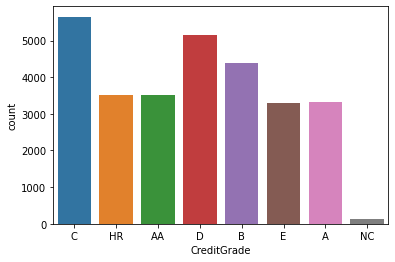

In [55]:
sns.countplot(x='CreditGrade', data=loann)
plt.show()

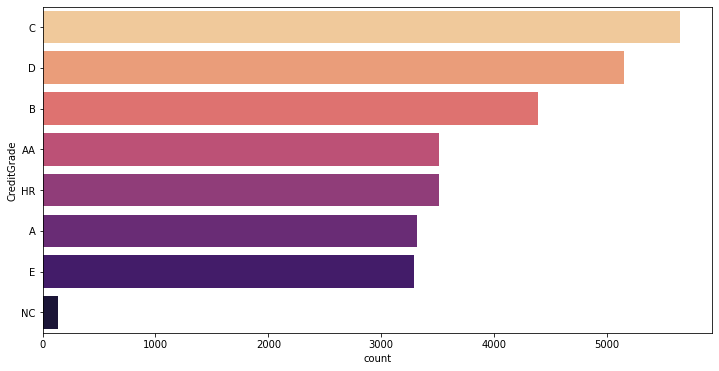

In [56]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = loann,y = 'CreditGrade', order = loann["CreditGrade"].value_counts().index[:10],palette = 'magma_r')
plt.show()


As we can see the countplots of the Credit Grades of the loan dataframe, the borrowers with the Credit Grade of C are the most in number, followed by D.

Research Question 2 : **Since there are so much low Credit Grade such
as C and D , does it lead to a higher amount of deliquency?** 

In [57]:
loann.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

The loan status of the borrowers are converted by me to good or delinquent. 

In [58]:
loann.BorrowerType.value_counts()

Good          96289
Delinquent    17648
Name: BorrowerType, dtype: int64

This shows that people who were having delays or problems with their loans were automatically labelled as delinquents and so their credit grade will be shown to be affected in terms of being a C or D instead of AA,A and B

Research Question 3 : **What is the highest number of BorrowerRate?** 

<AxesSubplot:xlabel='BorrowerRate', ylabel='Count'>

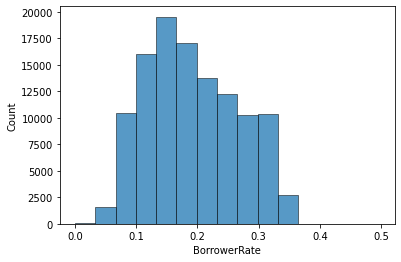

In [59]:
sns.histplot(loann.BorrowerRate,edgecolor='black', linewidth=0.5, bins =15)

In [60]:
loann['BorrowerRate'].max()

0.4975

In [61]:
loann['BorrowerRate'].value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.2201       1
0.0752       1
0.1416       1
0.2812       1
0.0739       1
Name: BorrowerRate, Length: 2294, dtype: int64

From the univariate analysis of the BorrowerRate feature, we can conclude that the borrower rate is highest at 0.4975 but the majority of the borrower rate values lie in the 0.13-0.35 range, with the most number of values being approx 0.15.

Research Question 4 : **Since the highest number of Borrower Rate
is between 0.1 and 0.2, does the highest number of Lender Yield is
between 0.1 and 0.2?** 

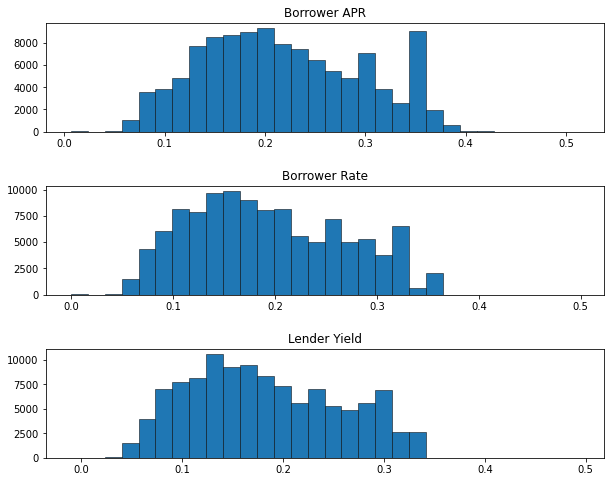

In [62]:
fig, ax = plt.subplots(3,1 ,figsize=(10,8),sharey='row')
#  plt.subplots(2,2,)
fig.subplots_adjust(hspace= 0.5)

ax[0].hist(loans.BorrowerAPR,30,edgecolor='black', linewidth=0.5)
ax[0].set_title("Borrower APR")


ax[1].hist(loans.BorrowerRate,30,edgecolor='black', linewidth=0.5)
ax[1].set_title("Borrower Rate")

ax[2].hist(loans.LenderYield,30,edgecolor='black', linewidth=0.5)
ax[2].set_title("Lender Yield")

fig.show()

The highest number of Lender Yield seems to be between 0.1 and 0.2, just like the Borrower Rate. The bulk of the loans seem to be 0.08 to 0.25 , which coincides with the credit rating histograms that show that the majority of the users are in the middle of the risk ratings. The lender yield and BorrowerRate plots are similar to borrower APR because they all represent interest rates.
The peak count is slightly lower than the one in the borrower APR plot, and I think it is because of the losses that are made when borrowers is penalized for default or charged off loans.

Research Question 5 : **Is the Credit Grade really accurate? Does
higher Credit Grade leads to higher Monthly Loan Payment? As for
Higher Credit Grade we mean from Grade AA to B** 

In [63]:
loan.MonthlyLoanPayment

0         330.43
1         318.93
2         123.32
3         321.45
4         563.97
           ...  
113932    364.74
113933     65.57
113934    273.35
113935    449.55
113936     64.90
Name: MonthlyLoanPayment, Length: 113937, dtype: float64

<AxesSubplot:xlabel='CreditGrade', ylabel='MonthlyLoanPayment'>

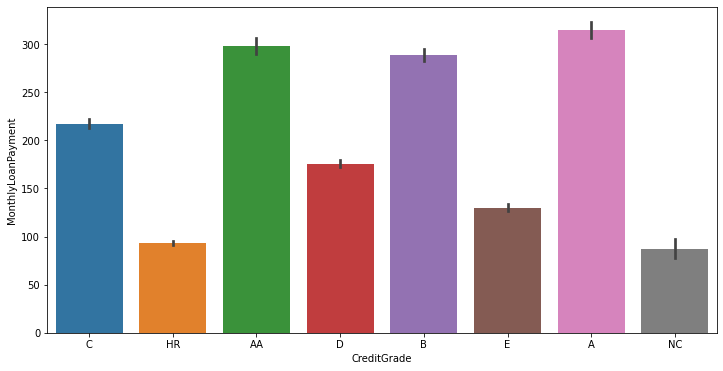

In [64]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='CreditGrade',y='MonthlyLoanPayment',data=loan) 

As per the barplot, we can conclude that higher Credit grade (like AA, A and B) lead to higher monthly loan payment. This value reaches approx from 270-320 whereas for the lower grades, the monthly loan payment is also much lower.

Research Question 6 : **Here we look at the Completed Loan Status
and Defaulted Rate to determine the accuracy of Credit Grade.**

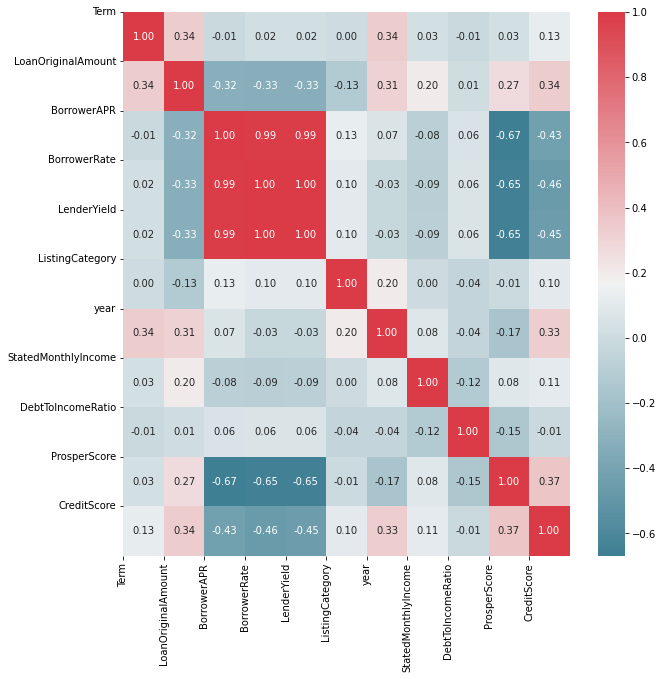

In [65]:
corr = loann.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Research Question 7 : **Now we know the Credit Grade is accurate
and is a tool that is used by the organization in determining the
person’s creditworthiness. Now we need to understand does the
ProsperScore, the custom built risk assesment system is being used
in determing borrower’s rate?**

From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.

**Business Insight**

Since the most important assest of a P2P lending Organization is its ability in using its tool to determine a borrower’s creditworthiness as accurate as possible. The organization would be more confident to market its organization as a great investment for investor to invest in hence leading to more borrower and higher market capitilization and boost revenue growth.

# **Feature Engineering for the selected features**

First, we will check the original values for the LoanStatus columns in order to have a better idea what to replace with later on after label encoding.

In [66]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'LoanStatus'.
loann['LoanStatus']= label_encoder.fit_transform(loann['LoanStatus'])
  
loann['LoanStatus'].unique()

array([ 2,  3,  6,  4,  1,  7,  0,  9,  8, 10,  5, 11])

Checking the new dataframe columns to see the new label encoded column

In [67]:
loann.columns

Index(['Term', 'LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'LoanStatus', 'ListingCategory', 'year', 'IncomeRange',
       'StatedMonthlyIncome', 'EmploymentStatus', 'BorrowerState',
       'DebtToIncomeRatio', 'Occupation', 'CreditGrade',
       'ProsperRating (Alpha)', 'ProsperScore', 'CreditScore', 'BorrowerType'],
      dtype='object')

In [68]:
loann.LoanStatus.value_counts()

3     56576
2     38074
1     11992
4      5018
6       806
8       363
9       313
10      304
7       265
5       205
11       16
0         5
Name: LoanStatus, dtype: int64

Checking the dataframe to see how the label encoded column look like

In [69]:
loann.head()

,Term,LoanOriginalAmount,BorrowerAPR,BorrowerRate,LenderYield,LoanStatus,ListingCategory,year,IncomeRange,StatedMonthlyIncome,EmploymentStatus,BorrowerState,DebtToIncomeRatio,Occupation,CreditGrade,ProsperRating (Alpha),ProsperScore,CreditScore,BorrowerType
0,36,9425,0.16516,0.1580,0.1380,2,0,2007,"$25,000-49,999",3083.333333,Self-employed,CO,0.17,Other,C,NaN,NaN,649.5,Good
1,36,10000,0.12016,0.0920,0.0820,3,2,2014,"$50,000-74,999",6125.000000,Employed,CO,0.18,Professional,NaN,A,7.0,689.5,Good
2,36,3001,0.28269,0.2750,0.2400,2,0,2007,Not displayed,2083.333333,Not available,GA,0.06,Other,HR,NaN,NaN,489.5,Good
3,36,10000,0.12528,0.0974,0.0874,3,16,2012,"$25,000-49,999",2875.000000,Employed,GA,0.15,Skilled Labor,NaN,A,9.0,809.5,Good
4,36,15000,0.24614,0.2085,0.1985,3,2,2013,"$100,000+",9583.333333,Employed,MN,0.26,Executive,NaN,D,4.0,689.5,Good


Notice that 1 new column was added to the DataFrame since the original ‘LoanStatus’ column contained 12 unique values.

## **Drop the Original Categorical Variable**

Lastly, we can drop the original ‘LoanStatus’ variable from the DataFrame since we no longer need it:

In [70]:
loann.drop('LoanStatus', axis=1, inplace=True)

In [71]:
loann.head()

,Term,LoanOriginalAmount,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory,year,IncomeRange,StatedMonthlyIncome,EmploymentStatus,BorrowerState,DebtToIncomeRatio,Occupation,CreditGrade,ProsperRating (Alpha),ProsperScore,CreditScore,BorrowerType
0,36,9425,0.16516,0.1580,0.1380,0,2007,"$25,000-49,999",3083.333333,Self-employed,CO,0.17,Other,C,NaN,NaN,649.5,Good
1,36,10000,0.12016,0.0920,0.0820,2,2014,"$50,000-74,999",6125.000000,Employed,CO,0.18,Professional,NaN,A,7.0,689.5,Good
2,36,3001,0.28269,0.2750,0.2400,0,2007,Not displayed,2083.333333,Not available,GA,0.06,Other,HR,NaN,NaN,489.5,Good
3,36,10000,0.12528,0.0974,0.0874,16,2012,"$25,000-49,999",2875.000000,Employed,GA,0.15,Skilled Labor,NaN,A,9.0,809.5,Good
4,36,15000,0.24614,0.2085,0.1985,2,2013,"$100,000+",9583.333333,Employed,MN,0.26,Executive,NaN,D,4.0,689.5,Good


Original LoanStatus column has been removed

In [72]:
loann.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

To name categorical values in IncomeRange column as numeric values

In [73]:
loann['IncomeRange']=loann['IncomeRange'].map({'Not displayed':0,'$0':1,'$1-24,999':2,'$25,000-49,999':3,'$50,000-74,999':4,'$75,000-99,999':5,'$100,000+':6})

Dropping BorrowerState and EmploymentStatus columns as they are not needed

In [74]:
loann.drop('BorrowerState', axis=1, inplace=True)
loann.drop('EmploymentStatus', axis=1, inplace=True)

In [75]:
loann.head()

,Term,LoanOriginalAmount,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory,year,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,Occupation,CreditGrade,ProsperRating (Alpha),ProsperScore,CreditScore,BorrowerType
0,36,9425,0.16516,0.1580,0.1380,0,2007,3,3083.333333,0.17,Other,C,NaN,NaN,649.5,Good
1,36,10000,0.12016,0.0920,0.0820,2,2014,4,6125.000000,0.18,Professional,NaN,A,7.0,689.5,Good
2,36,3001,0.28269,0.2750,0.2400,0,2007,0,2083.333333,0.06,Other,HR,NaN,NaN,489.5,Good
3,36,10000,0.12528,0.0974,0.0874,16,2012,3,2875.000000,0.15,Skilled Labor,NaN,A,9.0,809.5,Good
4,36,15000,0.24614,0.2085,0.1985,2,2013,6,9583.333333,0.26,Executive,NaN,D,4.0,689.5,Good


Occupation column also mot needed

In [76]:
loann.drop('Occupation', axis=1, inplace=True)

In [77]:
#To name categorical values in CreditGrade column as numeric values
loann['CreditGrade']=loann['CreditGrade'].map({'NC':0,'HR':1,'E':2,'D':3,'C':4,'B':5,'A':6,'AA':7})

In [78]:
loann['CreditGrade'] = loann['CreditGrade'].replace(np.nan,0)

In [79]:
#To name categorical values in ProsperRating (Alpha) column as numeric values
loann['ProsperRating (Alpha)']=loann['ProsperRating (Alpha)'].map({'HR':0,'E':1,'D':2,'C':3,'B':4,'A':5,'AA':6})

In [80]:
loann['ProsperRating (Alpha)'] = loann['ProsperRating (Alpha)'].replace(np.nan,0)

In [81]:
#To name categorical values in BorrowerType column as numeric values
loann['BorrowerType']=loann['BorrowerType'].map({'Good':0,'Delinquent':1})

In [82]:
#Replacing all NAN values in dataframe with 0
f_loann=loann.replace(np.nan, 0)

In [83]:
#New Dataframe
f_loann.head()

,Term,LoanOriginalAmount,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory,year,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,CreditGrade,ProsperRating (Alpha),ProsperScore,CreditScore,BorrowerType
0,36,9425,0.16516,0.1580,0.1380,0,2007,3,3083.333333,0.17,4.0,0.0,0.0,649.5,0
1,36,10000,0.12016,0.0920,0.0820,2,2014,4,6125.000000,0.18,0.0,5.0,7.0,689.5,0
2,36,3001,0.28269,0.2750,0.2400,0,2007,0,2083.333333,0.06,1.0,0.0,0.0,489.5,0
3,36,10000,0.12528,0.0974,0.0874,16,2012,3,2875.000000,0.15,0.0,5.0,9.0,809.5,0
4,36,15000,0.24614,0.2085,0.1985,2,2013,6,9583.333333,0.26,0.0,2.0,4.0,689.5,0


## **Splitting new dataframe into independent and dependent features for model building**

In [84]:
#splitting dataset into independent and dependent features
X=f_loann.iloc[:,:-1]
y=f_loann.iloc[:,-1]

In [85]:
X

,Term,LoanOriginalAmount,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory,year,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,CreditGrade,ProsperRating (Alpha),ProsperScore,CreditScore
0,36,9425,0.16516,0.1580,0.1380,0,2007,3,3083.333333,0.17,4.0,0.0,0.0,649.5
1,36,10000,0.12016,0.0920,0.0820,2,2014,4,6125.000000,0.18,0.0,5.0,7.0,689.5
2,36,3001,0.28269,0.2750,0.2400,0,2007,0,2083.333333,0.06,1.0,0.0,0.0,489.5
3,36,10000,0.12528,0.0974,0.0874,16,2012,3,2875.000000,0.15,0.0,5.0,9.0,809.5
4,36,15000,0.24614,0.2085,0.1985,2,2013,6,9583.333333,0.26,0.0,2.0,4.0,689.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,10000,0.22354,0.1864,0.1764,1,2013,4,4333.333333,0.13,0.0,3.0,5.0,709.5
113933,36,2000,0.13220,0.1110,0.1010,7,2011,5,8041.666667,0.11,0.0,5.0,8.0,709.5
113934,60,10000,0.23984,0.2150,0.2050,1,2013,3,2875.000000,0.51,0.0,2.0,3.0,709.5
113935,60,15000,0.28408,0.2605,0.2505,2,2011,3,3875.000000,0.48,0.0,3.0,5.0,689.5


In [86]:
y

0         0
1         0
2         0
3         0
4         0
         ..
113932    0
113933    0
113934    0
113935    0
113936    0
Name: BorrowerType, Length: 113937, dtype: int64

In [87]:
#Importing libraries for splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
#Creating instance of Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

## **Fitting and making the model**

In [89]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [90]:
logreg.score(X_train,y_train)

0.8521041052286664

In [91]:
# Y contains all the outputs and X contains all the inputs. We will test on the machine if it gives to expected Output for the 
# corresponding Inputs.

expected = y_test
predicted = logreg.predict(X_test)

## **To check accuracy**

In [92]:
# Importing Libraries and class 

from sklearn import metrics

In [93]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     24123
           1       0.60      0.13      0.21      4362

    accuracy                           0.85     28485
   macro avg       0.73      0.56      0.56     28485
weighted avg       0.82      0.85      0.81     28485



In [94]:
print(metrics.confusion_matrix(expected, predicted))

[[23757   366]
 [ 3811   551]]
